## Heart_Disease prediction
Problem statement: predicting whether one  has heart disease or not

## Importing required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## Loading the data

In [2]:

df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data analysis and Exploration

In [3]:
#getting the shape of the data
df.shape

(303, 14)

In [4]:
#getting the column names
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
#renaming the columns  with their real names
df.rename(columns={'cp': 'chest pain', 'trtbps': 'resting blood pressure','chol': 'cholesterol','fbs': 'fasting blood sugar',
                   'restecg': 'resting electrocardiographic result','thalachh': 'heart rate achieved','exng': 'Exercise induced','oldpeak': 'depression induced ',
                   'slp': 'speech language path','caa': 'cor artery anomaly','thall': 'blood disorder'}, inplace=True)


In [6]:
df.head()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic result,heart rate achieved,Exercise induced,depression induced,speech language path,cor artery anomaly,blood disorder,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic result,heart rate achieved,Exercise induced,depression induced,speech language path,cor artery anomaly,blood disorder,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#checking the null values
df.isna().sum()

age                                    0
sex                                    0
chest pain                             0
resting blood pressure                 0
cholesterol                            0
fasting blood sugar                    0
resting electrocardiographic result    0
heart rate achieved                    0
Exercise induced                       0
depression induced                     0
speech language path                   0
cor artery anomaly                     0
blood disorder                         0
output                                 0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

1

In [10]:
#getting the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  303 non-null    int64  
 1   sex                                  303 non-null    int64  
 2   chest pain                           303 non-null    int64  
 3   resting blood pressure               303 non-null    int64  
 4   cholesterol                          303 non-null    int64  
 5   fasting blood sugar                  303 non-null    int64  
 6   resting electrocardiographic result  303 non-null    int64  
 7   heart rate achieved                  303 non-null    int64  
 8   Exercise induced                     303 non-null    int64  
 9   depression induced                   303 non-null    float64
 10  speech language path                 303 non-null    int64  
 11  cor artery anomaly              

In [11]:
#getting the statistical summary
df.describe()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic result,heart rate achieved,Exercise induced,depression induced,speech language path,cor artery anomaly,blood disorder,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data cleaning  and preprocessing 

In [12]:
#dropping the duplicates
df=df.drop_duplicates()


In [13]:
#checking whether the duplicates  have been dropped
df.duplicated().sum()

0

## Data visualization 

In [14]:
import warnings 
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [15]:
#getting the value_counts for blood diorder
df["blood disorder"].value_counts()

blood disorder
2    165
3    117
1     18
0      2
Name: count, dtype: int64

In [16]:
#getting the value_counts for output
df["output"].value_counts()

output
1    164
0    138
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

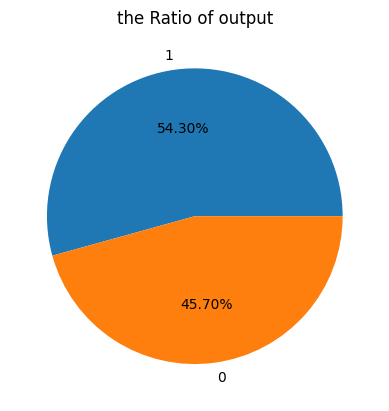

In [17]:
#distribution for target variable(output)
plt.pie(x = df['output'].value_counts() ,autopct='%1.2f%%' ,labels=df['output'].value_counts().index)
plt.title('the Ratio of output')
plt.show

<Axes: xlabel='output', ylabel='blood disorder'>

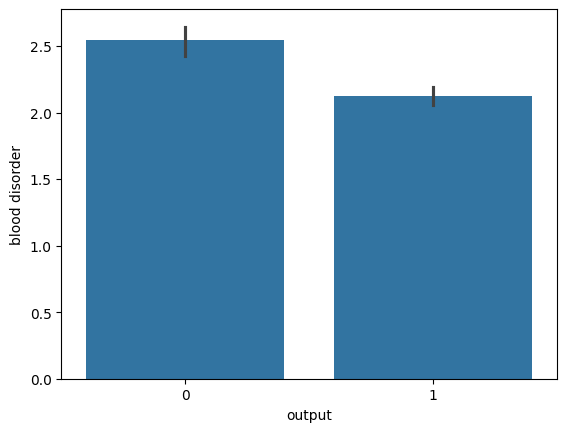

In [18]:
# # getting the  distribution of bloood disordrer in respect to target variable 
sns.barplot(y="blood disorder",x="output",data=df)

<Axes: xlabel='output', ylabel='cor artery anomaly'>

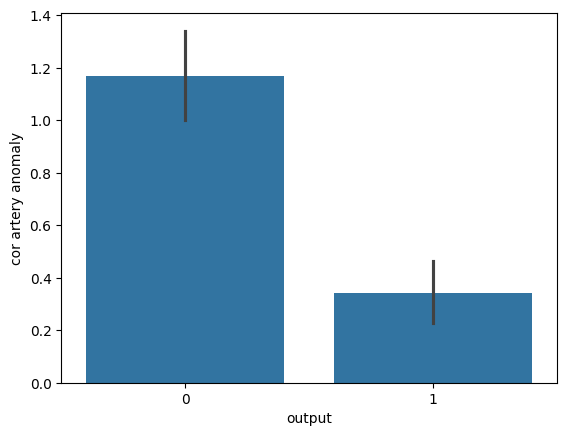

In [19]:
# getting the  distribution of cor artery anomaly in respect to target variable 
sns.barplot(y="cor artery anomaly",x="output",data=df)

<Axes: xlabel='output', ylabel='chest pain'>

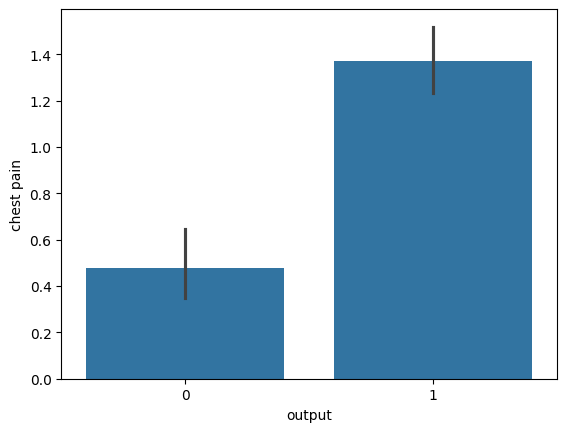

In [20]:
# getting the  distribution of chest pain in respect to target variable
sns.barplot(y="chest pain",x="output",data=df)

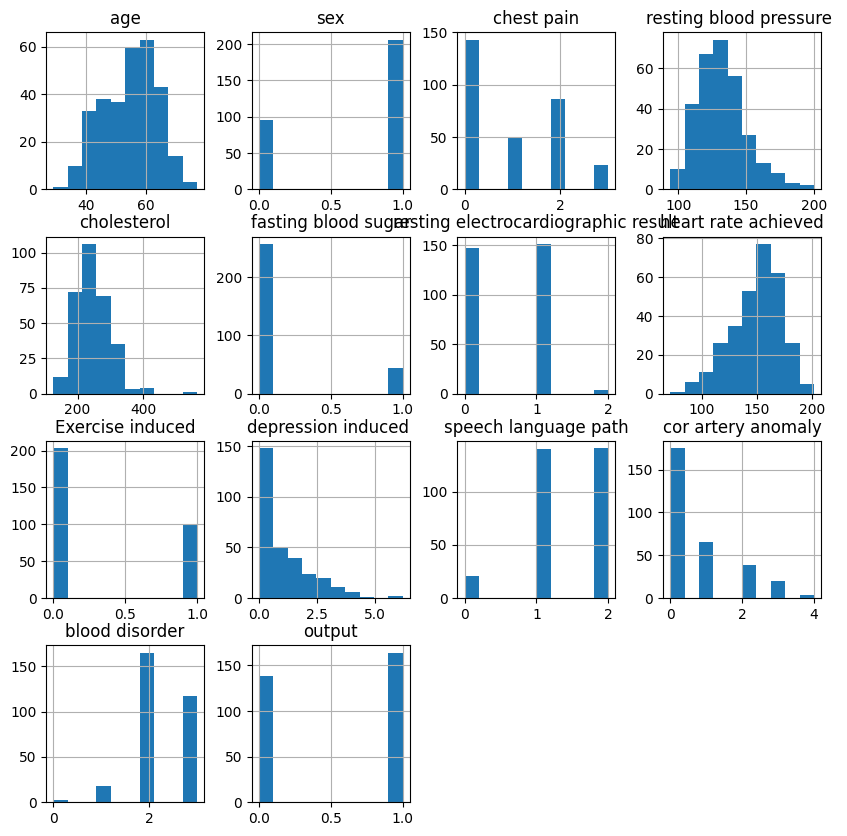

In [21]:
#distribution for all columns in the data 
df.hist(figsize=(10,10),bins=10)
plt.show()

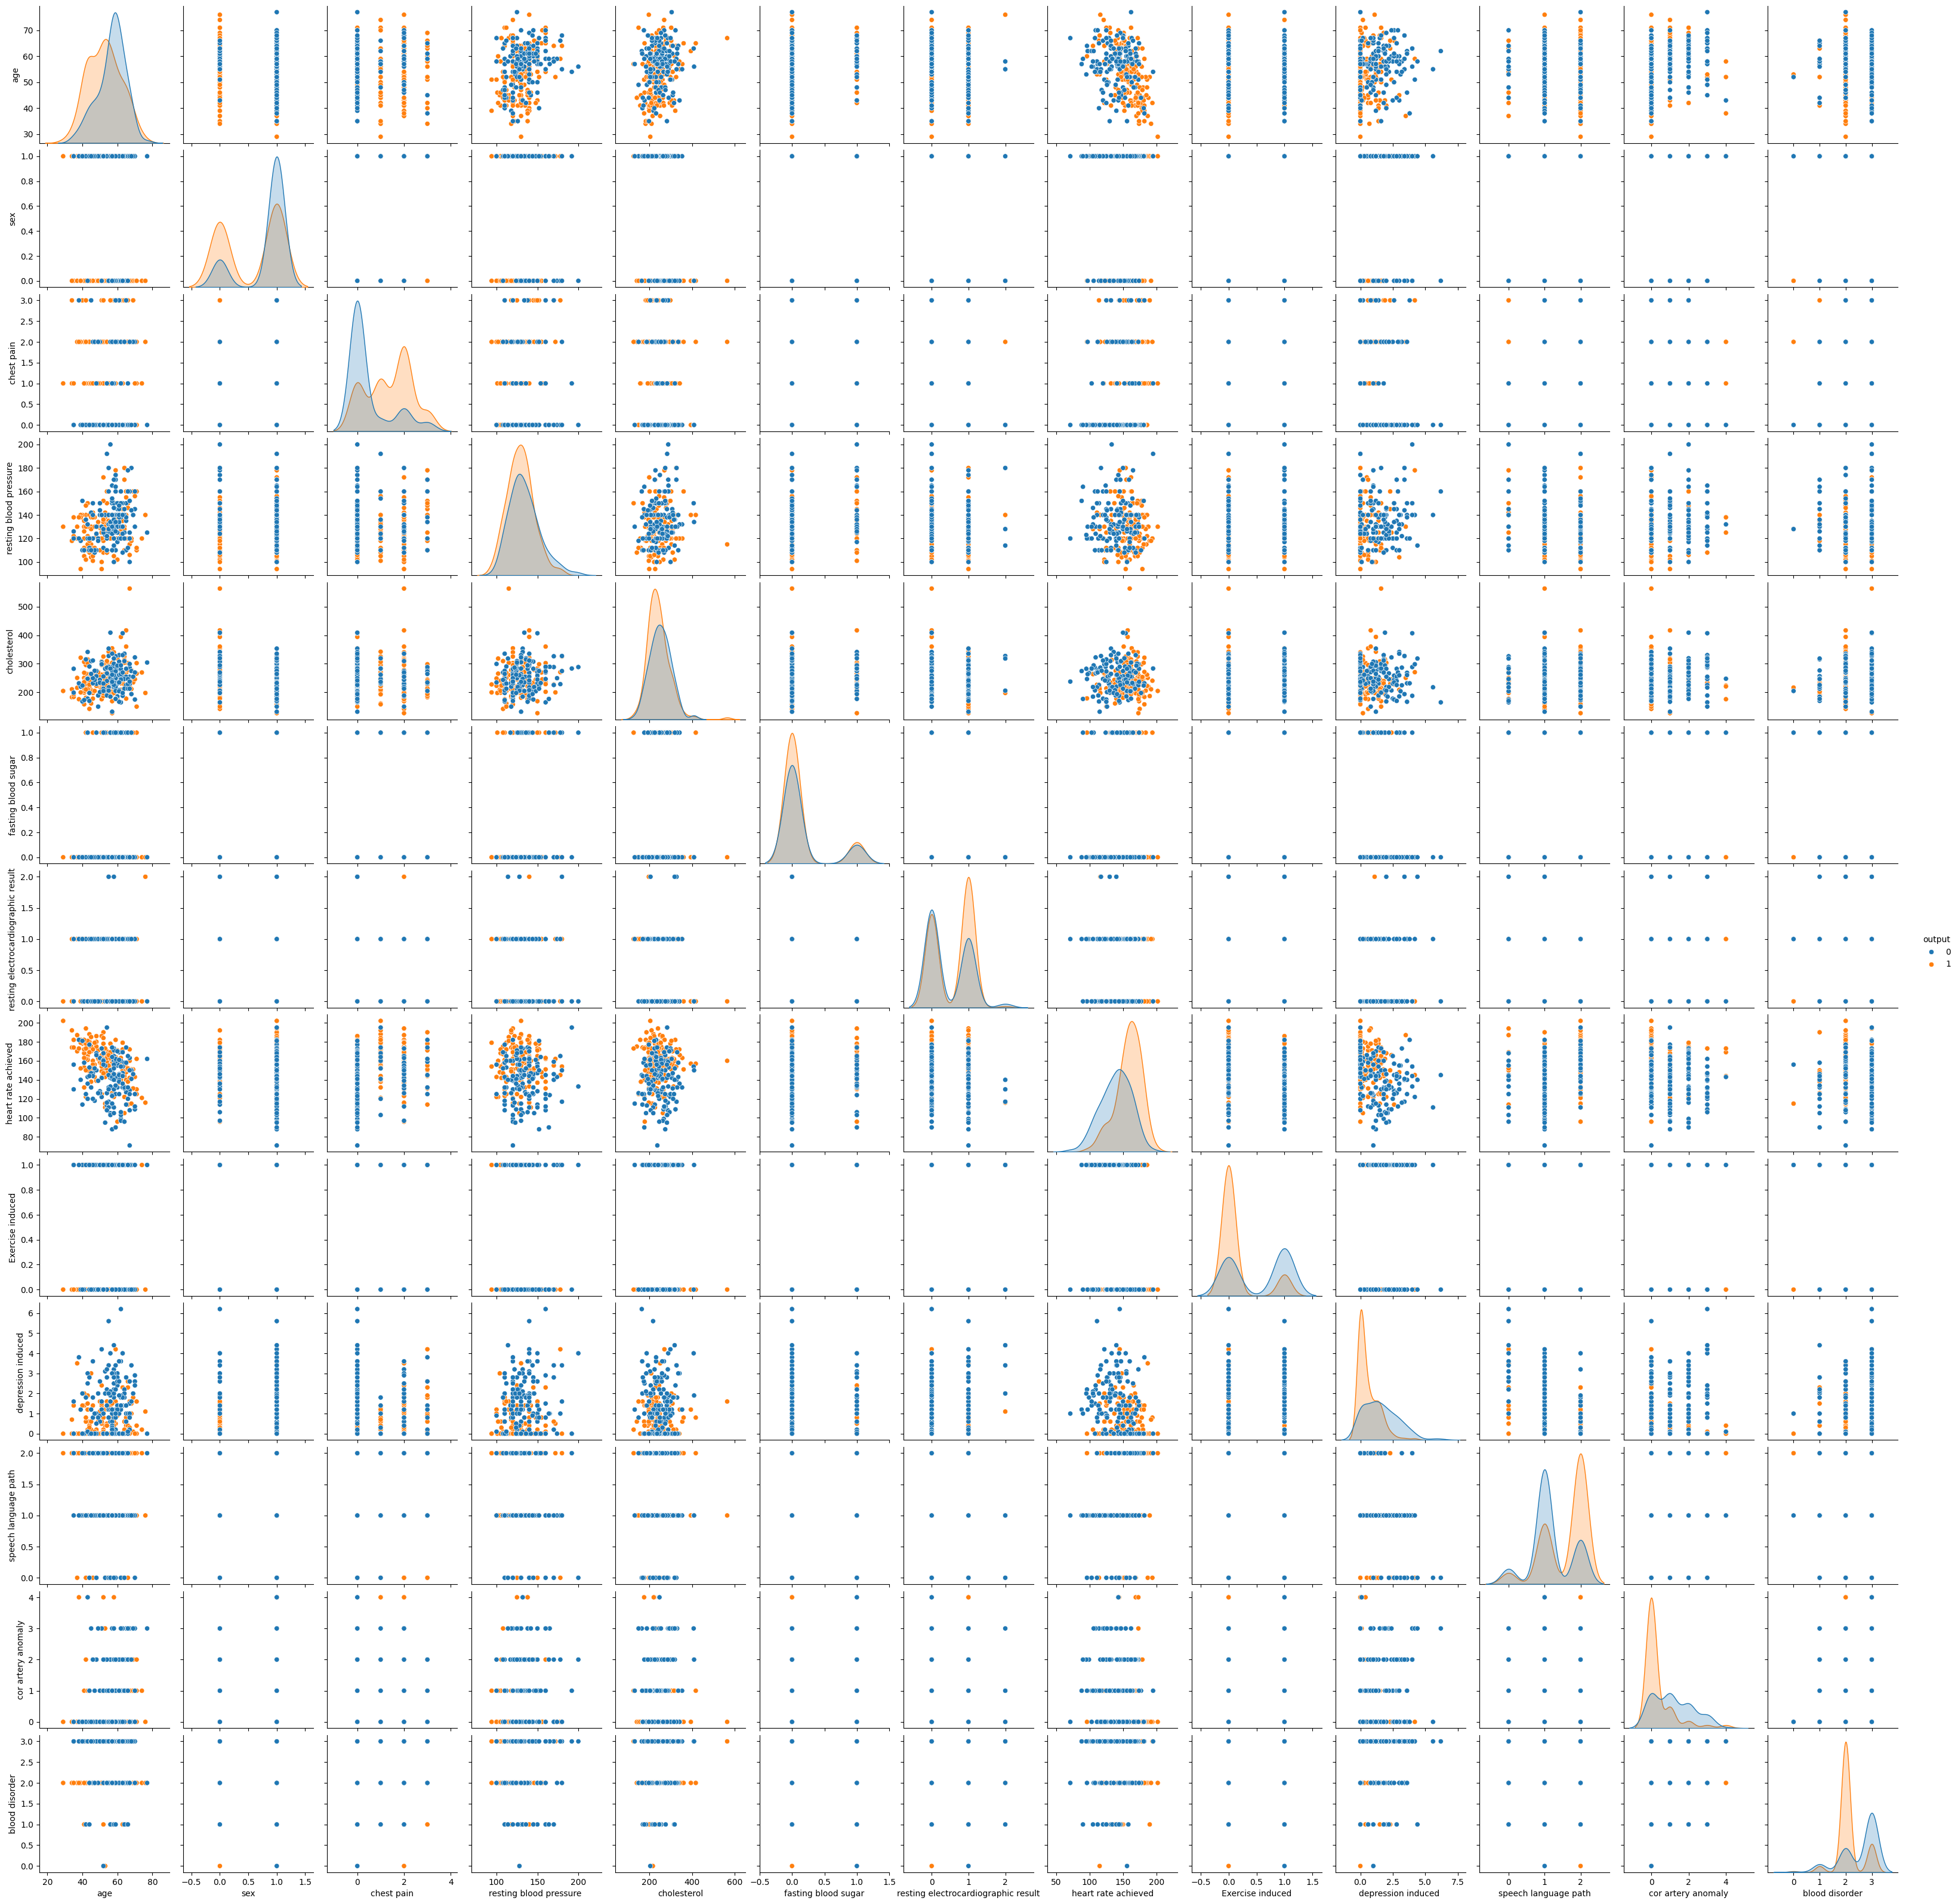

In [22]:
#  showing the relationship  with the help of pairplot
sns.pairplot(df,hue="output")


## Splitting the data

In [23]:
x=df.drop(["age","output"],axis=1)
y=df["output"]

In [24]:
print(x.shape)

(302, 12)


In [25]:
print(y.shape)

(302,)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Feature Engineering
#Feature selection

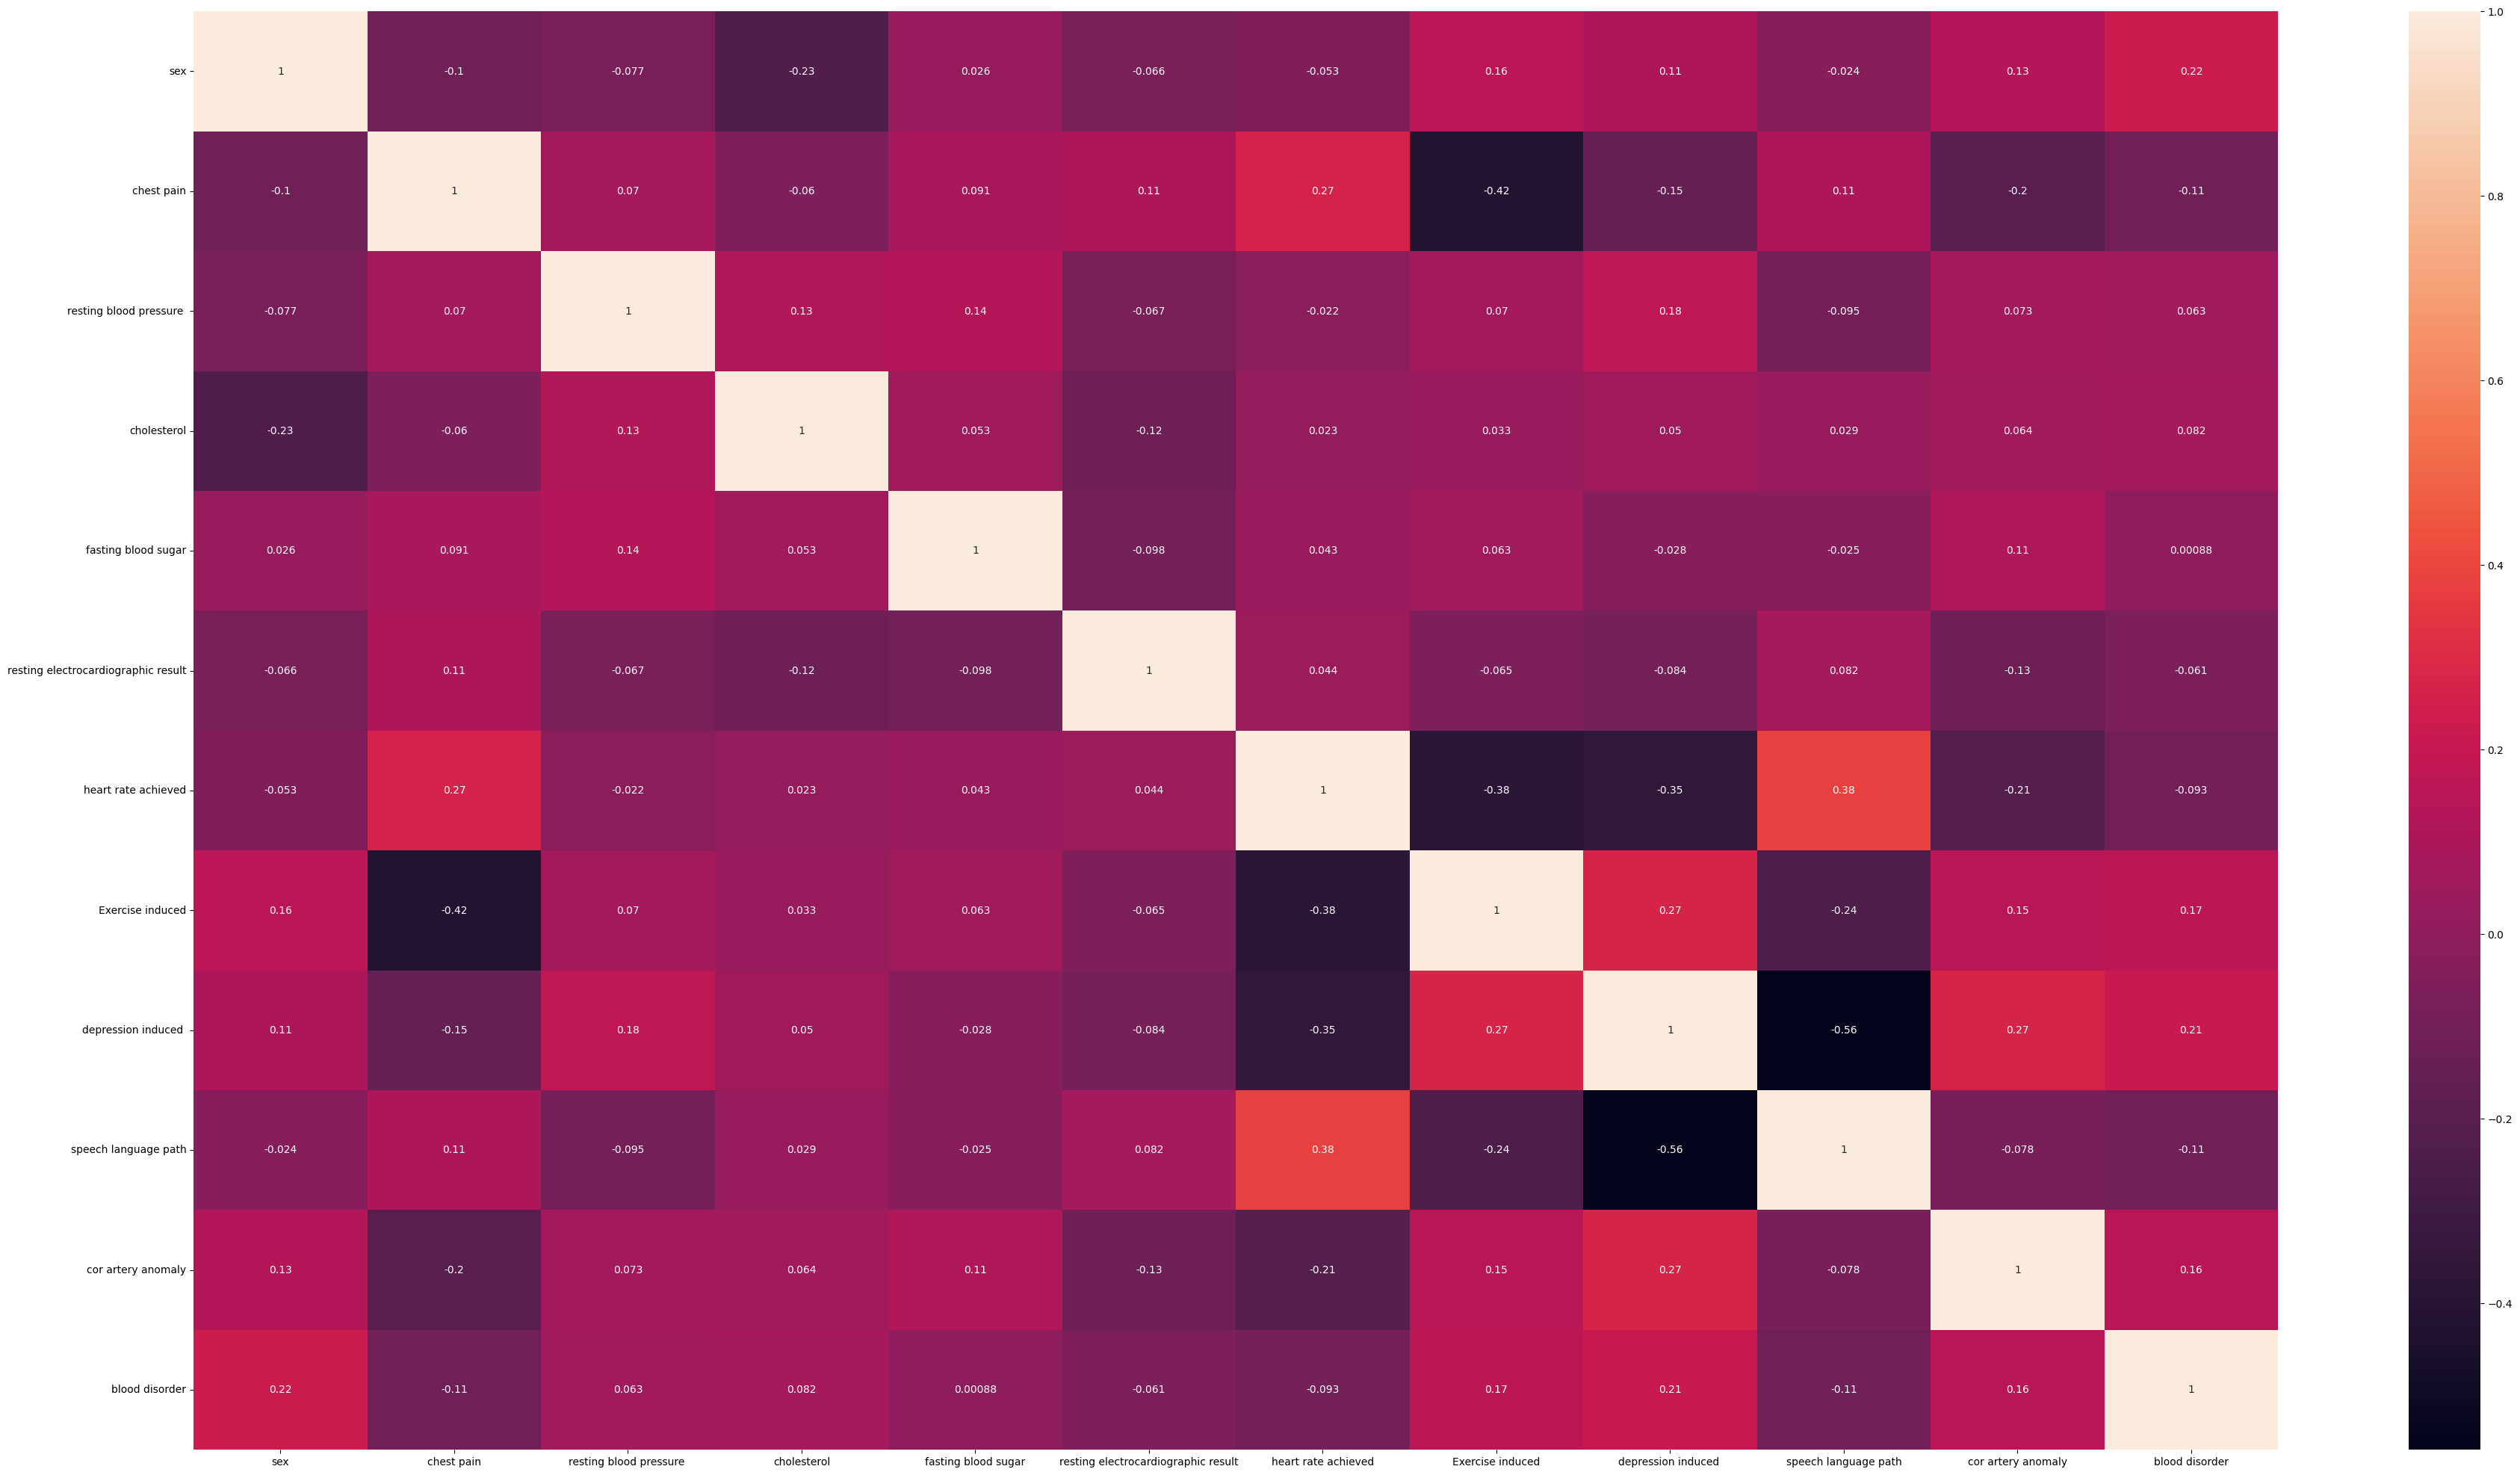

In [27]:
#feature selection with the help of a correlation heatmap where you  remove highly correlated features to reduce multi colinearity
plt.figure(figsize=(45,25))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()


In [28]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
#getting the  highly correlated features witha threshold of 0.6
#correlation between features in your dataset is generally low or if there is no pair of features that meets the specified threshold. I
corr_features=correlation(x_train,0.4)
len(set(corr_features))

0

##there are no features that are highly correlated therefore i have not to drop most of the  columns since no multi colinearity

## Building the model using LogisticRegression

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

## Evaluating the performance of the model trained using logisticRegression 

In [31]:
#evaluating the performance of the model
pred=lr.predict(x_test)

In [32]:
print(accuracy_score(y_test,pred)*100)

80.32786885245902


In [33]:
confusion_matrix(y_test,pred)

array([[16,  8],
       [ 4, 33]])

## Building the  model  using RandomForest

In [34]:
#randomforestclssifier algorithm
rf=RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

## Evaluating the performance of the model trained using RandomForest

In [36]:
preds=rf.predict(x_test)

In [37]:
print(accuracy_score(y_test,preds)*100)

83.60655737704919


In [38]:
confusion_matrix(y_test,preds)

array([[17,  7],
       [ 3, 34]])

## Building a predictive model

In [39]:
#getting the label for row 5
y_test.iloc[5]

0

In [40]:
#getting the features for row 5
x_test.iloc[5]

sex                                      1.0
chest pain                               0.0
resting blood pressure                 124.0
cholesterol                            266.0
fasting blood sugar                      0.0
resting electrocardiographic result      0.0
heart rate achieved                    109.0
Exercise induced                         1.0
depression induced                       2.2
speech language path                     1.0
cor artery anomaly                       1.0
blood disorder                           3.0
Name: 187, dtype: float64

In [42]:
#checking whether the model works correctly  based on unseen data
input_data=(1.0,0.0,124.0,266.0,0.0,0.0,109.0,1.0,2.2,1.0,1.0,3.0)
#changing input data into numpy array
convert=np.asarray(input_data)
#reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=lr.predict(reshaping)
print(prediction)
if(prediction[0]==1):
    print("you have heart disease")
else:
    print(" you dont have heart disease")

[0]
 you dont have heart disease
